# Model Recovery 

In [1]:
%reload_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
# %matplotlib inline
%matplotlib notebook
# %matplotlib widget

import numpy as np
from run_model_recovery import *
import multiprocessing as mp
import matplotlib.pyplot as plt

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 1000

## 1. Model comparison

Just some examples here

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 5.38629, BIC = 15.2018 (done in 14.1 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 724.7, BIC = 734.516 (done in 8.41 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 729.096, BIC = 748.727 (done in 8.94 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1252.31, BIC = 1262.13 (done in 3.7 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1026.71, BIC = 1036.52 (done in 3.24 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 740.206, BIC = 754.929 (done in 8.62 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1028.62, BIC = 1043.35 (done in 5.75 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 543.407, BIC = 563.038 (done in 8.74 secs)


<IPython.core.display.Javascript object>


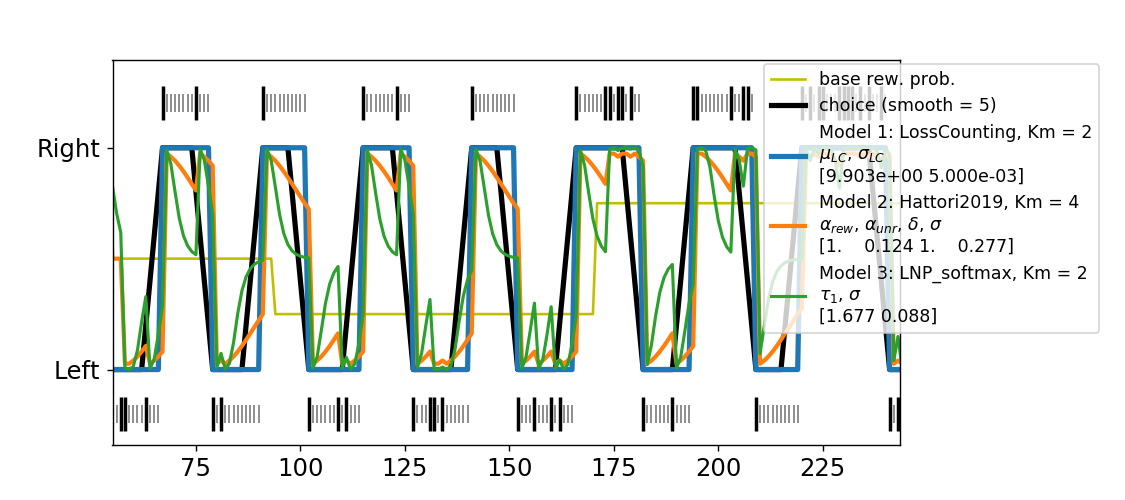

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
1,LossCounting,2,5.39,-0.00,15.20,"$\mu_{LC}$, $\sigma_{LC}$","[9.903, 0.005]"
8,Hattori2019,4,543.41,-116.83,563.04,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[1.0, 0.124, 1.0, 0.277]"
2,LNP_softmax,2,724.70,-156.20,734.52,"$\tau_1$, $\sigma$","[1.677, 0.088]"
3,LNP_softmax,4,729.10,-157.15,748.73,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[1.607, 2.572, 0.995, 0.086]"
6,Bari2019,3,740.21,-159.56,754.93,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.05, 0.414, 0.01]"
5,RW1972_softmax,2,1026.71,-221.78,1036.52,"$\alpha_{rew}$, $\sigma$","[0.973, 0.099]"
7,Hattori2019,3,1028.62,-222.19,1043.35,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[1.0, 0.972, 0.105]"
4,RW1972_epsi,2,1252.31,-270.77,1262.13,"$\alpha_{rew}$, $\epsilon$","[0.775, 0.626]"


In [9]:
fake_data = generate_fake_data('LossCounting', ['loss_count_threshold_mean','loss_count_threshold_std'], [10,0])
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[0,1,2])
model_comparison.show()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1346.3, BIC = 1356.11 (done in 6 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1220.24, BIC = 1230.06 (done in 3.98 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1221.46, BIC = 1241.09 (done in 8.63 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1252.45, BIC = 1262.27 (done in 3.67 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1207.73, BIC = 1217.55 (done in 3.49 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1209.23, BIC = 1223.95 (done in 5.68 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1209.39, BIC = 1224.12 (done in 6.22 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1211.03, BIC = 1230.66 (done in 7.53 secs)


<IPython.core.display.Javascript object>


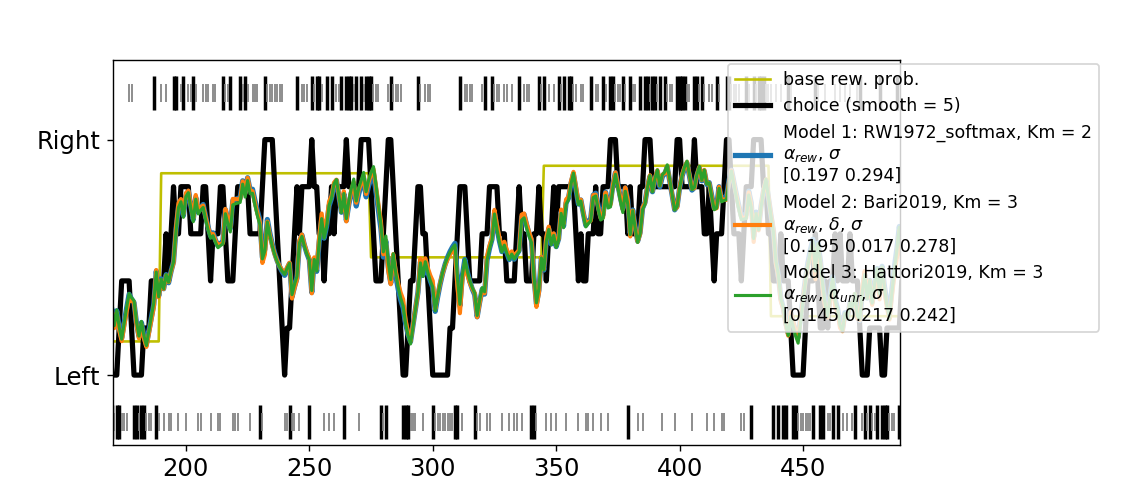

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
5,RW1972_softmax,2,1207.73,-0.00,1217.55,"$\alpha_{rew}$, $\sigma$","[0.197, 0.294]"
6,Bari2019,3,1209.23,-0.33,1223.95,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.195, 0.017, 0.278]"
7,Hattori2019,3,1209.39,-0.36,1224.12,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.145, 0.217, 0.242]"
8,Hattori2019,4,1211.03,-0.72,1230.66,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.168, 0.225, 0.016, 0.261]"
2,LNP_softmax,2,1220.24,-2.72,1230.06,"$\tau_1$, $\sigma$","[3.534, 0.312]"
3,LNP_softmax,4,1221.46,-2.98,1241.09,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[2.177, 11.294, 0.542, 0.287]"
4,RW1972_epsi,2,1252.45,-9.71,1262.27,"$\alpha_{rew}$, $\epsilon$","[0.146, 0.592]"
1,LossCounting,2,1346.30,-30.09,1356.11,"$\mu_{LC}$, $\sigma_{LC}$","[4.103, 10.0]"


In [10]:
fake_data = generate_fake_data('RW1972_softmax', ['learn_rate_rew','softmax_temperature'], [0.2,0.3])
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[0,1,2])
model_comparison.show()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1222.49, BIC = 1232.3 (done in 5.72 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 749.621, BIC = 759.436 (done in 3.8 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 753.621, BIC = 773.252 (done in 7.66 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1030.28, BIC = 1040.09 (done in 4.1 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 865.235, BIC = 875.05 (done in 3.56 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 751.736, BIC = 766.46 (done in 8.35 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 864.733, BIC = 879.456 (done in 7.85 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 753.375, BIC = 773.006 (done in 7.6 secs)


<IPython.core.display.Javascript object>


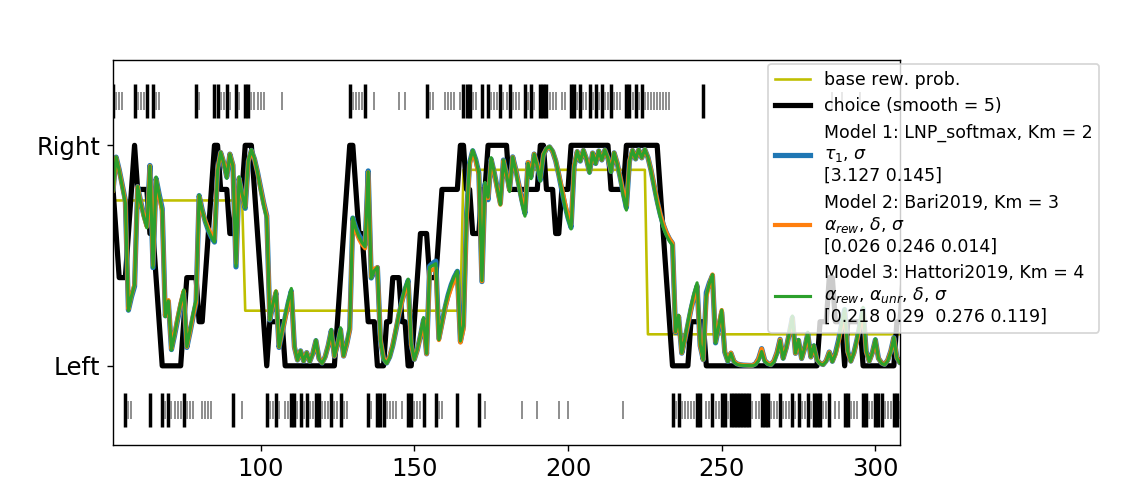

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
2,LNP_softmax,2,749.62,-0.00,759.44,"$\tau_1$, $\sigma$","[3.127, 0.145]"
6,Bari2019,3,751.74,-0.46,766.46,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.026, 0.246, 0.014]"
8,Hattori2019,4,753.38,-0.82,773.01,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.218, 0.29, 0.276, 0.119]"
3,LNP_softmax,4,753.62,-0.87,773.25,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[3.128, 10.953, 1.0, 0.145]"
7,Hattori2019,3,864.73,-25.00,879.46,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.053, 0.27, 0.04]"
5,RW1972_softmax,2,865.23,-25.11,875.05,"$\alpha_{rew}$, $\sigma$","[0.205, 0.123]"
4,RW1972_epsi,2,1030.28,-60.94,1040.09,"$\alpha_{rew}$, $\epsilon$","[0.217, 0.41]"
1,LossCounting,2,1222.49,-102.68,1232.30,"$\mu_{LC}$, $\sigma_{LC}$","[13.73, 10.0]"


In [11]:
fake_data = generate_fake_data('Hattori2019', ['learn_rate_rew','learn_rate_unrew', 'forget_rate','softmax_temperature'], 
                                                      [0.4, 0.2, 0.2, 0.23], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[0,1,2])
model_comparison.show()

Try to fit the behavior of some special foragers

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1402.9, BIC = 1412.72 (done in 4.8 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1390.32, BIC = 1400.13 (done in 1.24 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1393.94, BIC = 1413.57 (done in 2.93 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1390.11, BIC = 1399.92 (done in 3.57 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1390.07, BIC = 1399.89 (done in 1.62 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1390.63, BIC = 1405.35 (done in 3.43 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1391.41, BIC = 1406.14 (done in 5.66 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1393.65, BIC = 1413.28 (done in 4.99 secs)


<IPython.core.display.Javascript object>


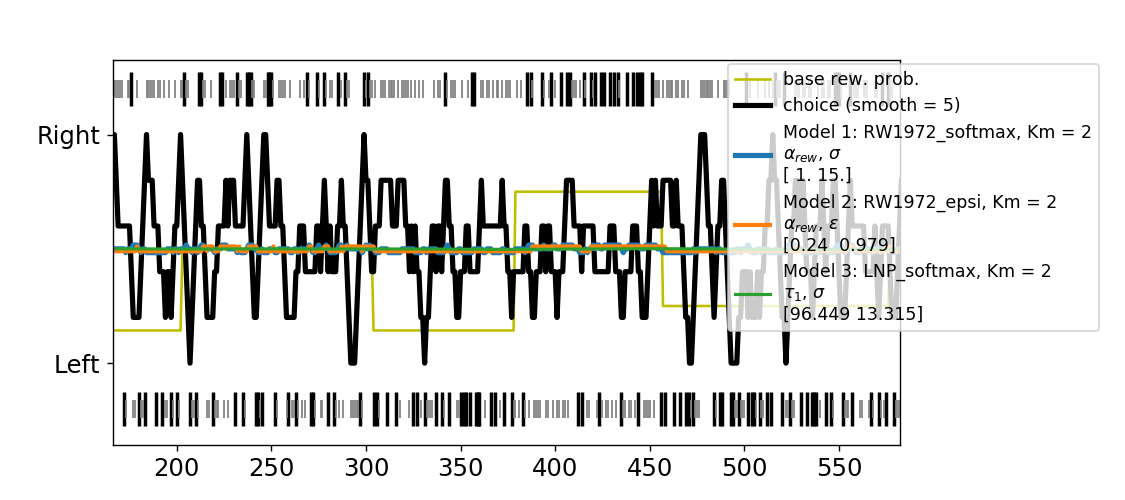

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
5,RW1972_softmax,2,1390.07,-0.00,1399.89,"$\alpha_{rew}$, $\sigma$","[1.0, 15.0]"
4,RW1972_epsi,2,1390.11,-0.01,1399.92,"$\alpha_{rew}$, $\epsilon$","[0.24, 0.979]"
2,LNP_softmax,2,1390.32,-0.05,1400.13,"$\tau_1$, $\sigma$","[96.449, 13.315]"
6,Bari2019,3,1390.63,-0.12,1405.35,"$\alpha_{rew}$, $\delta$, $\sigma$","[1.0, 0.943, 8.596]"
7,Hattori2019,3,1391.41,-0.29,1406.14,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.003, 1.0, 0.086]"
8,Hattori2019,4,1393.65,-0.78,1413.28,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.007, 1.0, 1.0, 0.098]"
3,LNP_softmax,4,1393.94,-0.84,1413.57,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[0.001, 24.924, 1.0, 15.0]"
1,LossCounting,2,1402.90,-2.79,1412.72,"$\mu_{LC}$, $\sigma_{LC}$","[1.372, 10.0]"


In [12]:
fake_data = generate_fake_data('Random', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[0,1,2])
model_comparison.show()

Note that these fittings cannot differentiate IdealpHatGreedy and pMatching.

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1464.95, BIC = 1474.76 (done in 5.17 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1169.62, BIC = 1179.44 (done in 3.18 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1173.62, BIC = 1193.25 (done in 7.08 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1383.11, BIC = 1392.92 (done in 3.18 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1375.47, BIC = 1385.28 (done in 2.18 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1172.97, BIC = 1187.7 (done in 9.5 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1369.91, BIC = 1384.63 (done in 3.13 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1134.79, BIC = 1154.42 (done in 7.56 secs)


<IPython.core.display.Javascript object>


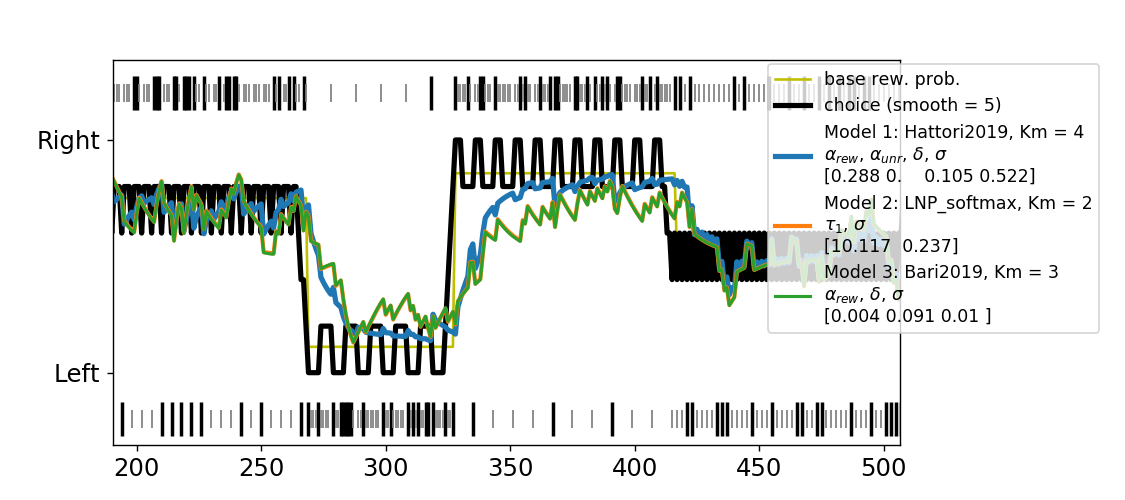

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
8,Hattori2019,4,1134.79,-0.00,1154.42,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.288, 0.0, 0.105, 0.522]"
2,LNP_softmax,2,1169.62,-7.56,1179.44,"$\tau_1$, $\sigma$","[10.117, 0.237]"
6,Bari2019,3,1172.97,-8.29,1187.70,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.004, 0.091, 0.01]"
3,LNP_softmax,4,1173.62,-8.43,1193.25,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[9.356, 10.154, 0.0, 0.237]"
7,Hattori2019,3,1369.91,-51.06,1384.63,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.594, 0.068, 0.694]"
5,RW1972_softmax,2,1375.47,-52.26,1385.28,"$\alpha_{rew}$, $\sigma$","[0.44, 1.531]"
4,RW1972_epsi,2,1383.11,-53.92,1392.92,"$\alpha_{rew}$, $\epsilon$","[0.823, 0.908]"
1,LossCounting,2,1464.95,-71.69,1474.76,"$\mu_{LC}$, $\sigma_{LC}$","[2.126, 10.0]"


In [13]:
fake_data = generate_fake_data('IdealpHatGreedy', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[0,1,2])
model_comparison.show()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1326.78, BIC = 1336.6 (done in 6.31 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1080.77, BIC = 1090.58 (done in 4.56 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1084.77, BIC = 1104.4 (done in 6.71 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1323.08, BIC = 1332.9 (done in 3.52 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1305.95, BIC = 1315.76 (done in 2.82 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1084.45, BIC = 1099.17 (done in 9.44 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1300.66, BIC = 1315.38 (done in 6.59 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1054.98, BIC = 1074.61 (done in 7.08 secs)


<IPython.core.display.Javascript object>


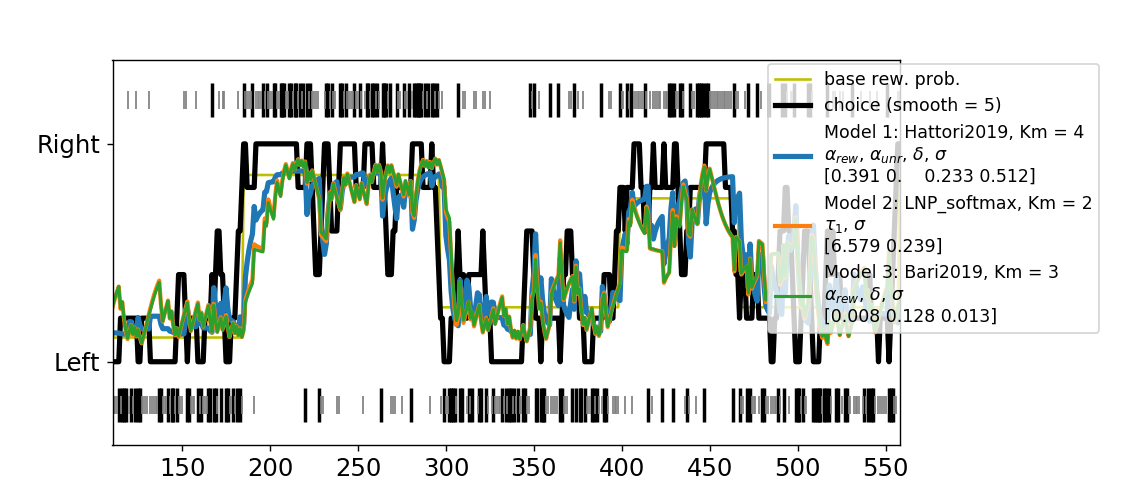

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
8,Hattori2019,4,1054.98,-0.00,1074.61,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.391, 0.0, 0.233, 0.512]"
2,LNP_softmax,2,1080.77,-5.60,1090.58,"$\tau_1$, $\sigma$","[6.579, 0.239]"
6,Bari2019,3,1084.45,-6.40,1099.17,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.008, 0.128, 0.013]"
3,LNP_softmax,4,1084.77,-6.47,1104.40,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[6.578, 27.225, 1.0, 0.239]"
7,Hattori2019,3,1300.66,-53.35,1315.38,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.018, 0.384, 0.045]"
5,RW1972_softmax,2,1305.95,-54.50,1315.76,"$\alpha_{rew}$, $\sigma$","[0.191, 0.417]"
4,RW1972_epsi,2,1323.08,-58.22,1332.90,"$\alpha_{rew}$, $\epsilon$","[0.143, 0.789]"
1,LossCounting,2,1326.78,-59.02,1336.60,"$\mu_{LC}$, $\sigma_{LC}$","[9.013, 10.0]"


In [14]:
fake_data = generate_fake_data('pMatching', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data)
model_comparison.fit(pool = pool, plot_predictive=[0,1,2])
model_comparison.show()

# 2. Confusion matrix and Inversion matrix

The range for generating parameters:

```python
def generate_random_para(para_name):
    # Define models to run (slightly narrower range than models in BanditModelComparison)
    if para_name in 'loss_count_threshold_mean':
        return np.random.uniform(0, 30)
    elif para_name in 'loss_count_threshold_std':
        return np.random.uniform(0, 5)
    elif para_name in ['tau1', 'tau2']:
        return 10**np.random.uniform(0, np.log10(30)) 
    elif para_name in ['w_tau1', 'learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'epsilon']:
        return np.random.uniform(0, 1)
    elif para_name in 'softmax_temperature':
        return 1/np.random.exponential(10)
```

Don't try to rerun this... It took 9 hours!

In [6]:
compute_confusion_matrix(models = [1,2,3,4,5,6,7,8], n_runs = 100, n_trials = 1000, pool = pool)

Runs: 100%|███████████████████████████████████████████████████████████████████████| 100/100 [9:32:03<00:00, 343.23s/it]


Load results and plot

Finally we got this! As expected, AIC looks better. <br>

1. The crosstalk between models are highly correlated with their similarities:

- [4,3]: When $\tau_1=\tau_2$, model (4) --> (3)
- [6,5] and [8,7]: When $\alpha_{unr} = \alpha_{rew}$, model (6) --> (5), model (8) --> (7)
- [7,3] and [8,3]: When $\delta = \alpha$, RL-like --> local INCOME in LNP!

2.  The model (3) $\tau_1, \sigma$ (Sugrue 2004) is the most volatile one. Because it's simple.
3.  Compare (3) and (5) --> INCOME and RETURN are different. 
4.  Compare (2) and (5) --> $\epsilon$ and $\sigma$ are different.

<IPython.core.display.Javascript object>


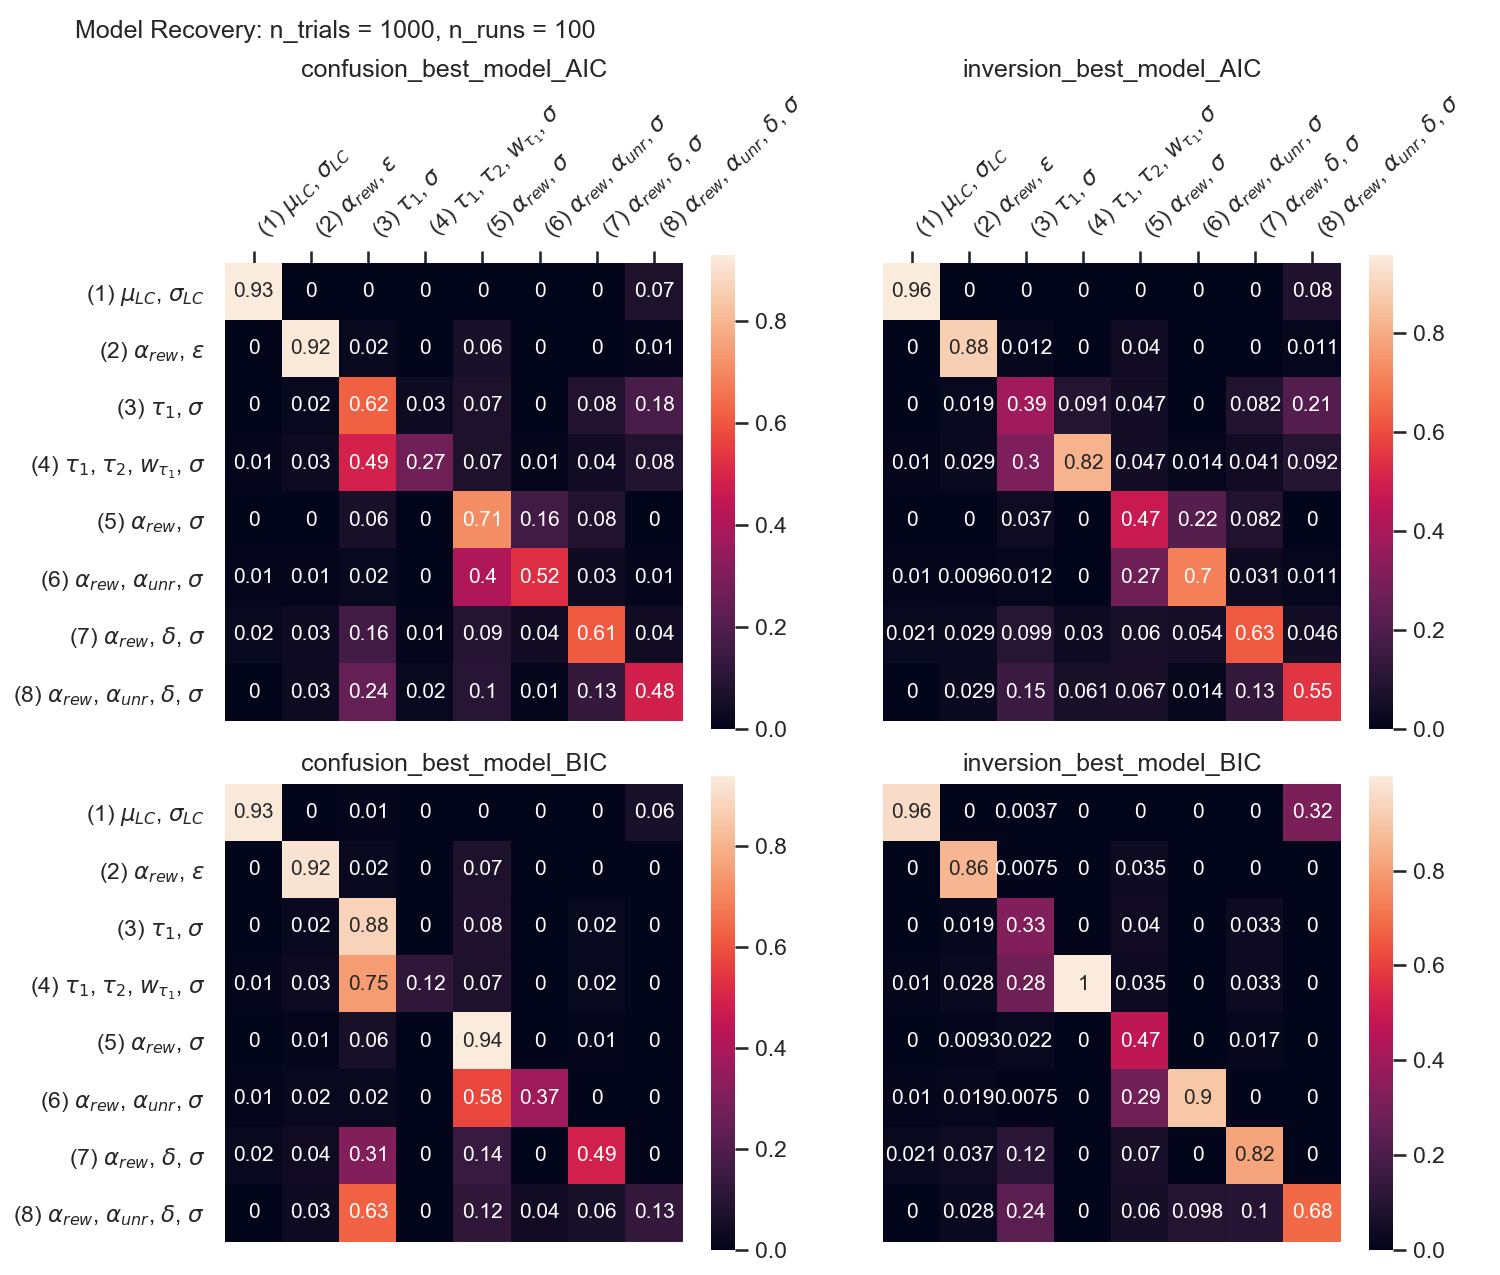

<IPython.core.display.Javascript object>


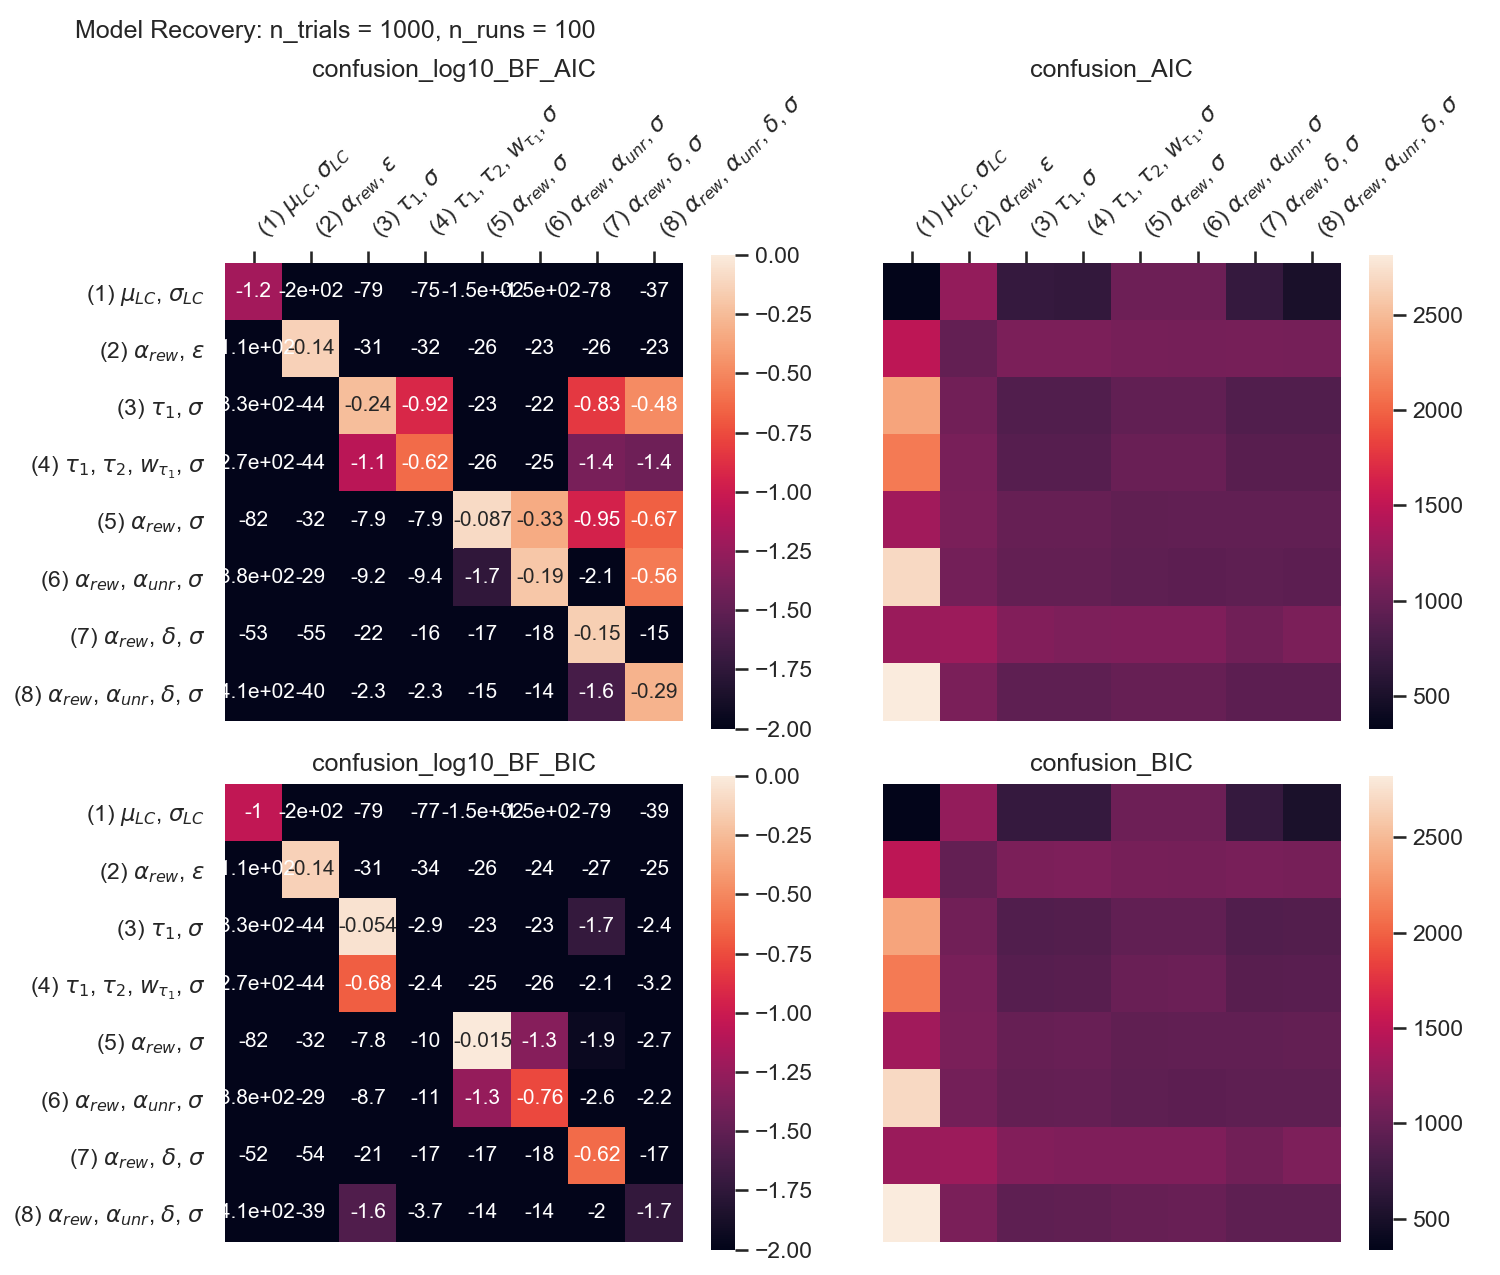

In [22]:
from plot_fitting import plot_confusion_matrix
confusion_results = pickle.load(open(".\\results\confusion_results.p", "rb"))
plot_confusion_matrix(confusion_results, order = [1,4,2,3,5,7,6,8])